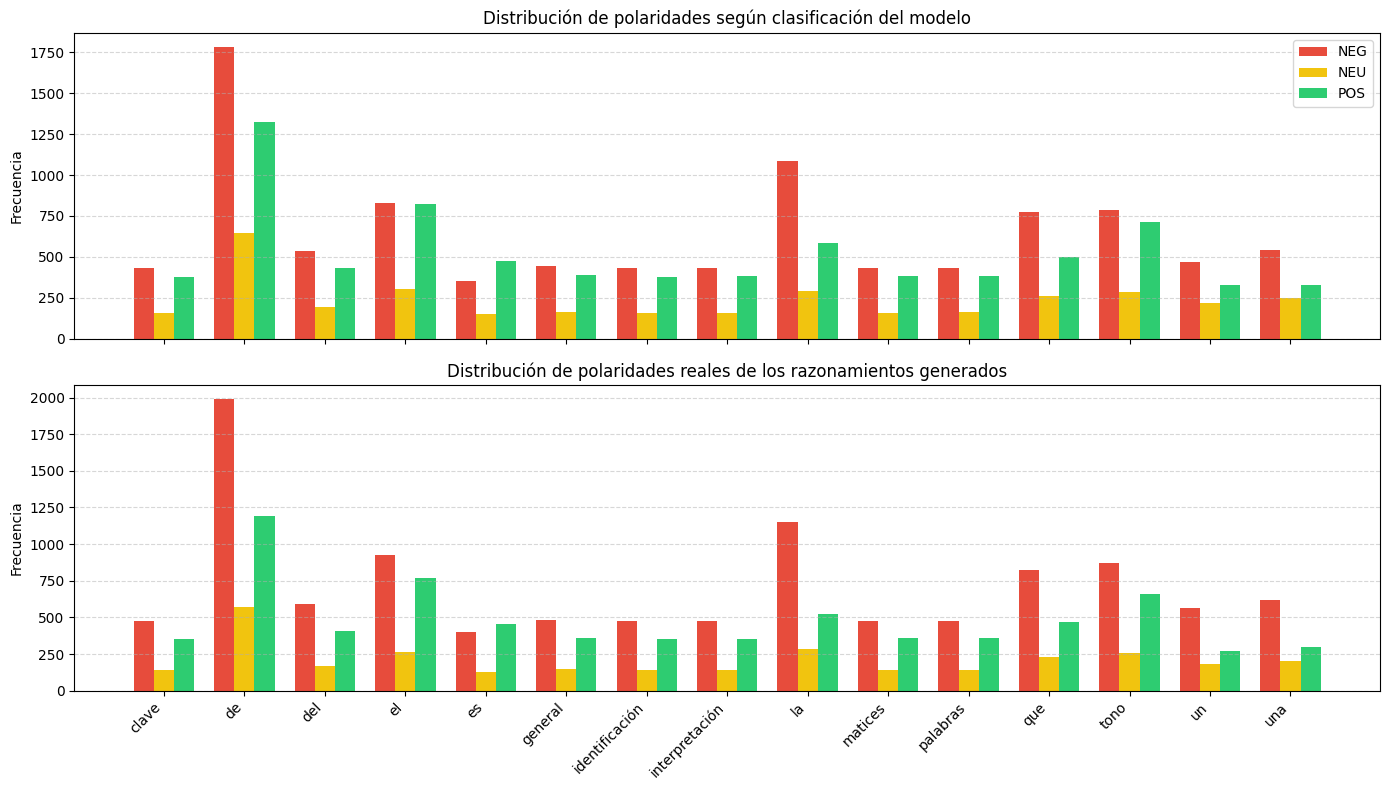

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Cargar el Excel
df = pd.read_excel("../datos/Clasificación_GPT-4o-mini-Completo.xlsx")

# Filtrar textos válidos
df_filtered = df.dropna(subset=['Raw_GPT-4o-mini_Chain_Of_Thought'])
texts = df_filtered["Raw_GPT-4o-mini_Chain_Of_Thought"]
labels_pred = df_filtered["Polarity_GPT-4o-mini_Chain_Of_Thought"]
labels_real = df_filtered["Polarity"]

# Vectorizar con las 15 palabras más frecuentes
vectorizer = CountVectorizer(max_features=15)
X = vectorizer.fit_transform(texts)
words = vectorizer.get_feature_names_out()

# Inicializar contadores
word_counts_pred = {w: [0, 0, 0] for w in words}
word_counts_real = {w: [0, 0, 0] for w in words}
pol_map = {'NEG': 0, 'NEU': 1, 'POS': 2}

# Contar ocurrencias por polaridad
for i, row in df_filtered.iterrows():
    bow = vectorizer.transform([row["Raw_GPT-4o-mini_Chain_Of_Thought"]]).toarray()[0]
    pred_label = row["Polarity_GPT-4o-mini_Chain_Of_Thought"]
    real_label = row["Polarity"]
    for idx, count in enumerate(bow):
        if count > 0:
            word = words[idx]
            if pred_label in pol_map:
                word_counts_pred[word][pol_map[pred_label]] += count
            if real_label in pol_map:
                word_counts_real[word][pol_map[real_label]] += count

# Preparar datos para gráficas
selected_words = list(words)
pred_data = [word_counts_pred[w] for w in selected_words]
real_data = [word_counts_real[w] for w in selected_words]

# Dibujar gráfica
x = np.arange(len(selected_words))
width = 0.25
colors = ['#e74c3c', '#f1c40f', '#2ecc71']
labels = ['NEG', 'NEU', 'POS']

fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Parte superior: clasificación predicha
for i in range(3):
    axs[0].bar(x + (i - 1) * width, [p[i] for p in pred_data], width, label=labels[i], color=colors[i])
axs[0].set_title('Distribución de polaridades según clasificación del modelo')
axs[0].set_ylabel('Frecuencia')
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.5)

# Parte inferior: polaridad real
for i in range(3):
    axs[1].bar(x + (i - 1) * width, [r[i] for r in real_data], width, label=labels[i], color=colors[i])
axs[1].set_title('Distribución de polaridades reales de los razonamientos generados')
axs[1].set_ylabel('Frecuencia')
axs[1].set_xticks(x)
axs[1].set_xticklabels(selected_words, rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
